# Day 6-7: Exploratory Data Analysis (EDA)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

1.	Basic Statistics

In [44]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(df.describe())
print('-----------------------------------------------------------------------------------------')
print(df['FraudFound_P'].value_counts())  # Check class balance
df

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15419.000000        15419.000000  15419.000000  15419.000000   
mean       2.788637            2.694079     40.685842      0.059861   
std        1.287611            1.259082     12.181893      0.237237   
min        1.000000            1.000000     16.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     39.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count   15419.00000  15419.000000  15419.000000  15419.000000  15419.000000  
mean     7710.90168      8.482846    407.704780      2.487840   1994.866528  
std      4451.37980      4.599798     43.952379      1.119482      0.803309  
min         1.00000      1.000000    300.000000 

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15415,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15416,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15417,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


2.	Fraud Distribution

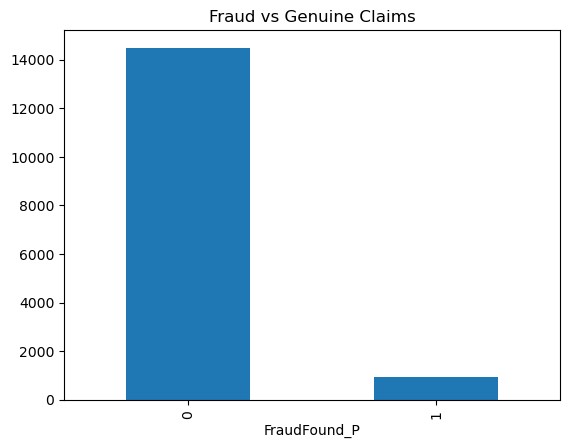

In [173]:

df['FraudFound_P'].value_counts().plot(kind='bar')
plt.title('Fraud vs Genuine Claims')
plt.savefig('Fraud vs Genuine Claims.png')
plt.show()

3.	Analyze Key Features

In [51]:
# # 1. Policy Annual Premium by Fraud
# df.groupby('fraud_reported')['policy_annual_premium'].mean().plot(kind='bar', color=['green', 'red'])
# plt.title('Average Policy Premium: Fraud vs Genuine')
# plt.xlabel('Fraud Reported')
# plt.ylabel('Average Premium ($)')
# plt.xticks(rotation=0)
# plt.show()

# insufficient data 

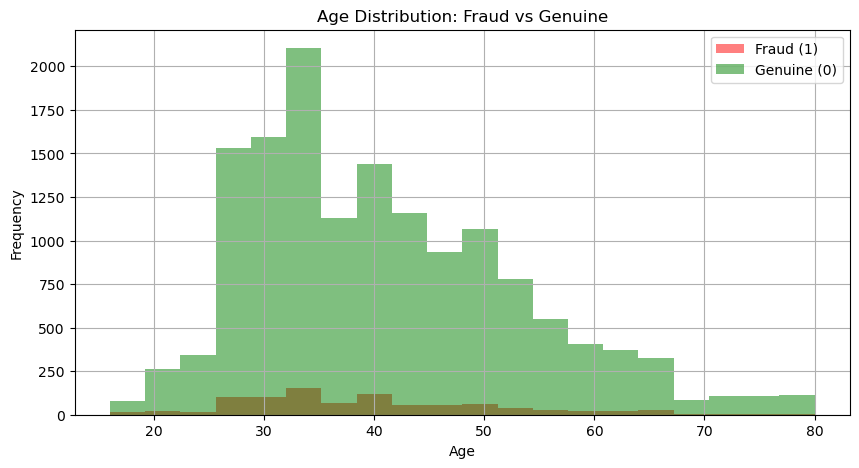

In [92]:
# 2. Age Distribution by Fraud
plt.figure(figsize=(10, 5))
df[df['FraudFound_P'] == 1]['Age'].hist(bins=20, alpha=0.5, label='Fraud (1)', color='red')
df[df['FraudFound_P'] == 0]['Age'].hist(bins=20, alpha=0.5, label='Genuine (0)', color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Fraud vs Genuine')
plt.legend()
plt.savefig('age_distribution_fraud.png')
plt.show()

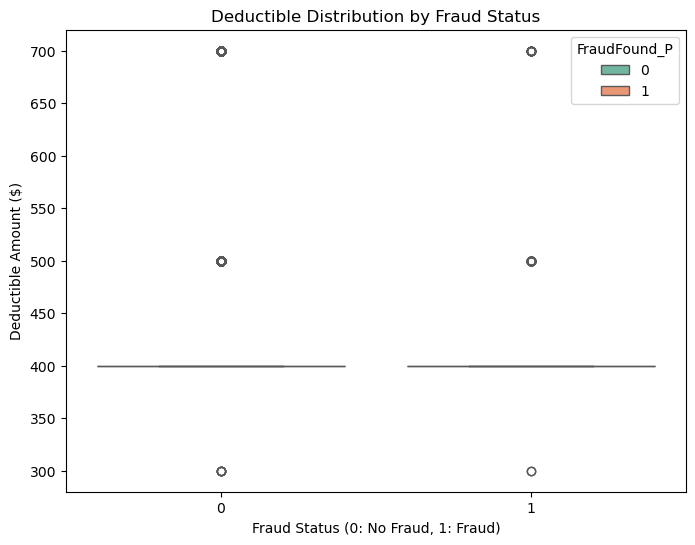

In [56]:
# 3. Total Claim Amount (sum of all claim types)
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudFound_P', y='Deductible', data=df, palette='Set2', hue='FraudFound_P')
plt.title('Deductible Distribution by Fraud Status')
plt.xlabel('Fraud Status (0: No Fraud, 1: Fraud)')
plt.ylabel('Deductible Amount ($)')
plt.savefig('deductible_boxplot.png')
plt.show()

In [58]:
# # 4. Incident Severity Breakdown
# pd.crosstab(df['incident_severity'], df['fraud_reported'], normalize='columns').plot(kind='bar')
# plt.title('Incident Severity Distribution by Fraud Status')
# plt.xlabel('Incident Severity')
# plt.ylabel('Proportion')
# plt.legend(title='Fraud Reported')
# plt.xticks(rotation=45)
# plt.show()

# insufficient data -> incident_severity

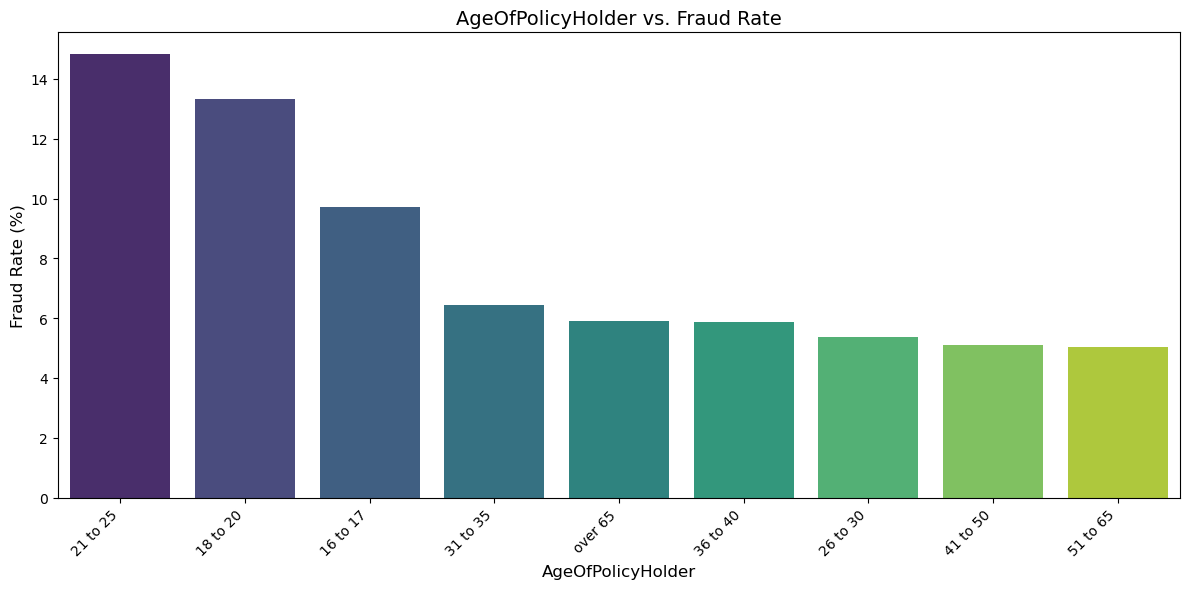

In [101]:

plt.figure(figsize=(12, 6))
fraud_rate = df.groupby('AgeOfPolicyHolder')['FraudFound_P'].mean().sort_values(ascending=False)
sns.barplot(    x=fraud_rate.index, y=fraud_rate.values * 100, palette='viridis', hue=fraud_rate.index, legend=False)
plt.title(f'{'AgeOfPolicyHolder'} vs. Fraud Rate', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xlabel('AgeOfPolicyHolder', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{'AgeOfPolicyHolder'}_fraud_rate.png')
plt.show()

In [60]:
# # 5. Incident Type vs Fraud
# pd.crosstab(df['incident_type'], df['fraud_reported']).plot(kind='bar', figsize=(10, 5))
# plt.title('Incident Type: Fraud vs Genuine')
# plt.xlabel('Incident Type')
# plt.ylabel('Count')
# plt.legend(title='Fraud Reported')
# plt.xticks(rotation=45)
# plt.show()

# insufficient data -> incident_type

<Figure size 700x500 with 0 Axes>

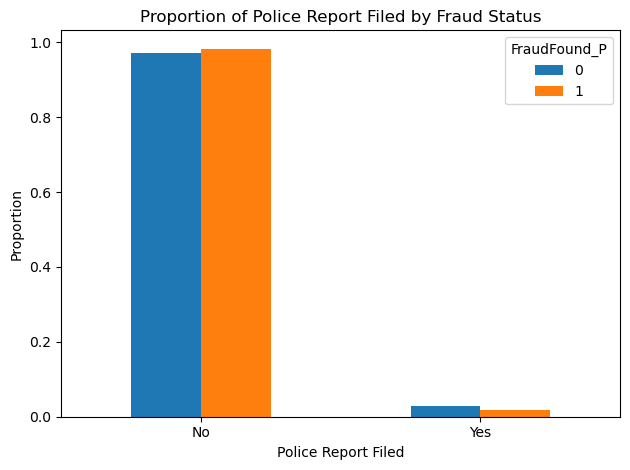

In [63]:
# 7. Police Report Filed
plt.figure(figsize=(7, 5))
pd.crosstab(df['PoliceReportFiled'], df['FraudFound_P'], normalize='columns').plot(kind='bar')
plt.title('Proportion of Police Report Filed by Fraud Status')
plt.xlabel('Police Report Filed')
plt.ylabel('Proportion')
plt.legend(title='FraudFound_P')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('police_report_filed_fraud_proportion.png')
plt.show()


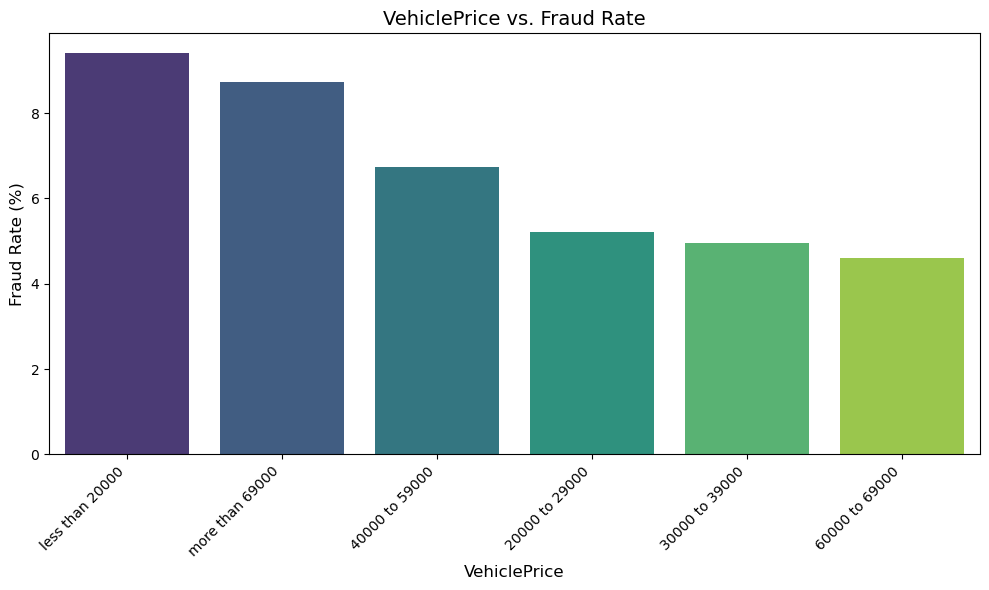

In [103]:
plt.figure(figsize=(10, 6))
fraud_rate = df.groupby('VehiclePrice')['FraudFound_P'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_rate.index, y=fraud_rate.values * 100, palette='viridis',hue=fraud_rate.index, legend=False)
plt.title(f'{'VehiclePrice'} vs. Fraud Rate', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xlabel('VehiclePrice', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{'VehiclePrice'}_fraud_rate.png')
plt.show()

In [66]:
# # 8. Number of Witnesses
# df.groupby('fraud_reported')['witnesses'].mean().plot(kind='bar', color=['green', 'red'])
# plt.title('Average Number of Witnesses')
# plt.xlabel('Fraud Reported')
# plt.ylabel('Average Witnesses')
# plt.show()

# insufficient data -> number of witnesses

In [68]:
# # 9. Insured Education Level
# pd.crosstab(df['insured_education_level'], df['fraud_reported']).plot(kind='bar', figsize=(10, 5))
# plt.title('Education Level: Fraud vs Genuine')
# plt.xlabel('Education Level')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Fraud Reported')
# plt.show()

# insufficient data -> Education lvl of the insured

In [70]:
# # 10. Insured Occupation
# pd.crosstab(df['insured_occupation'], df['fraud_reported']).plot(kind='bar', figsize=(12, 5))
# plt.title('Occupation: Fraud vs Genuine')
# plt.xlabel('Occupation')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Fraud Reported')
# plt.tight_layout()
# plt.show()

# insufficient data -> Occupation of the insured

- Age distribution
-	Policy type breakdown
-	Geographic patterns

4.	Correlation Analysis

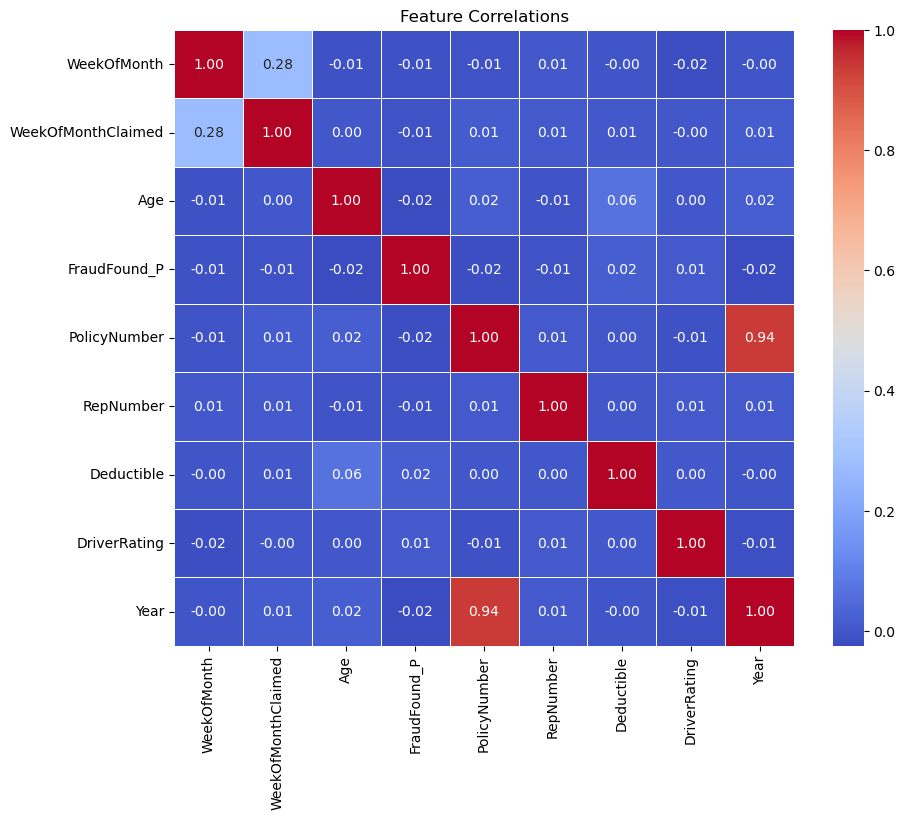

In [96]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlations')
plt.savefig('correlation_heatmap.png')
plt.show() 

### Correlation Analysis Report
Column 1,		Column 2,		Coefficient (r),	Implication

PolicyNumber,		Year,			0.94,			"Collinear,drop one"
WeekOfMonth,		WeekOfMonthClaimed,	0.28,			Moderate temporal link
FraudFound_P,		Age,			0.022,			Very weak predictor
FraudFound_P,		Deductible,		0.017,			Very weak predictor
FraudFound_P,		DriverRating,		−0.025,			Very weak predictor
All Other Pairs,	(Various),		≈±0.01 or less,		Not significant

In [113]:
# Correlation Analysis Report
data = {'Column 1': ['PolicyNumber', 'WeekOfMonth', 'FraudFound_P', 'FraudFound_P', 'FraudFound_P', 'All Other Pairs'],'Column 2': ['Year', 'WeekOfMonthClaimed', 'Age', 'Deductible', 'DriverRating', '(Various)'],'Coefficient (r)': ['0.94', '0.28', '0.022', '0.017', '-0.025', '≈ ± 0.01 or less'],'Implication': ['Collinear, drop one', 'Moderate temporal link', 'Very weak predictor', 'Very weak predictor', 'Very weak predictor', 'Not significant']}
df_corr_summary = pd.DataFrame(data)
display(Markdown("## Concise Pairwise Correlation Analysis")) # check how markdown works
print(df_corr_summary.to_markdown(index=False, numalign="left", stralign="left"))

## Concise Pairwise Correlation Analysis

| Column 1        | Column 2           | Coefficient (r)   | Implication            |
|:----------------|:-------------------|:------------------|:-----------------------|
| PolicyNumber    | Year               | 0.94              | Collinear, drop one    |
| WeekOfMonth     | WeekOfMonthClaimed | 0.28              | Moderate temporal link |
| FraudFound_P    | Age                | 0.022             | Very weak predictor    |
| FraudFound_P    | Deductible         | 0.017             | Very weak predictor    |
| FraudFound_P    | DriverRating       | -0.025            | Very weak predictor    |
| All Other Pairs | (Various)          | ≈ ± 0.01 or less  | Not significant        |


5.	Feature Relationships
-	Scatter plots for claim_amount vs age
-	Box plots for categorical features vs fraud

### Box plots for categorical features vs fraud

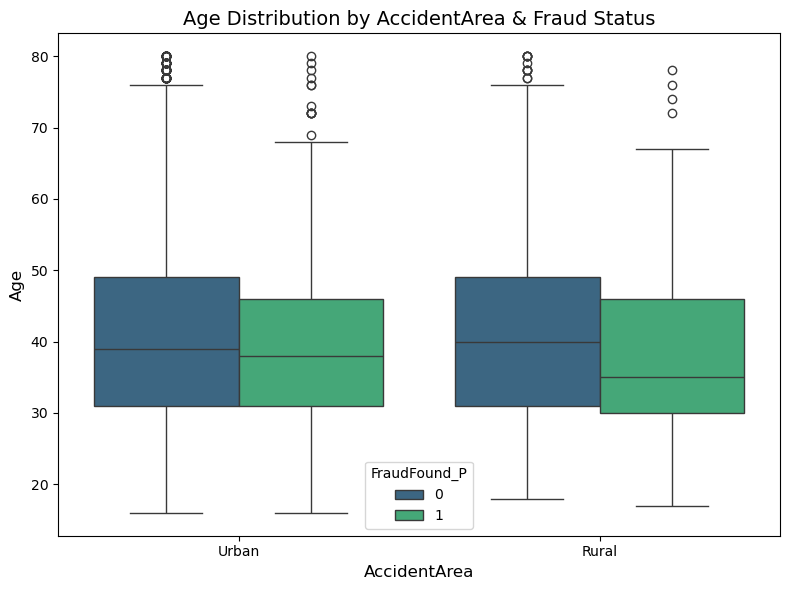

In [165]:
groups_1 = df.groupby(['AccidentArea', 'FraudFound_P'])['Age']

for (cat_val, fraud_val), group_data_1 in groups:
    Q1_1 = group_data_1.quantile(0.25)
    Q3_1 = group_data_1.quantile(0.75)
    IQR_1 = Q3_1 - Q1_1
    lower_1 = Q1_1 - 1.5 * IQR_1
    upper_1 = Q3_1 + 1.5 * IQR_1
    outliers_1 = group_data_1[(group_data_1 < lower_1) | (group_data_1 > upper_1)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='AccidentArea', y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {'AccidentArea'} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('AccidentArea', fontsize=12)
plt.tight_layout()
plt.savefig('boxplot_accident_area.png')
plt.show()

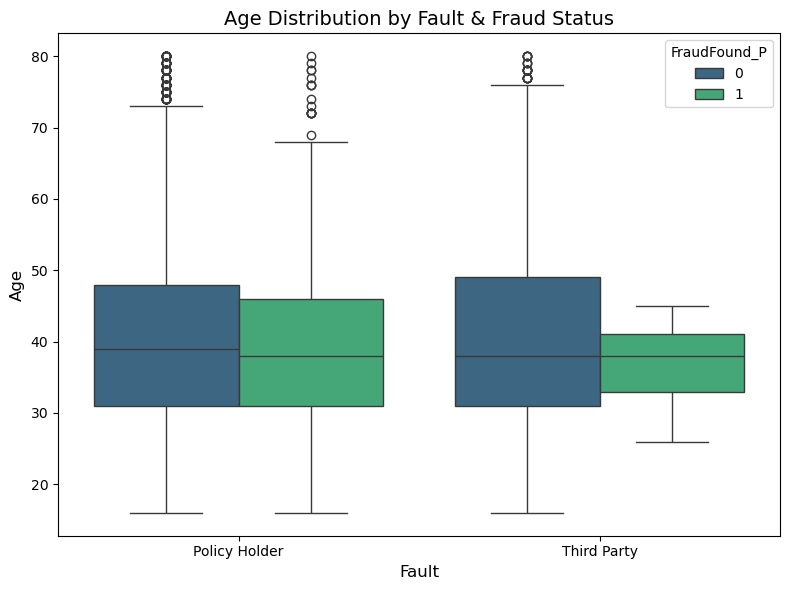

In [163]:
groups_2 = df.groupby(['Fault', 'FraudFound_P'])['Age']

for (cat_val, fraud_val), group_data_2 in groups:
    Q1_2 = group_data_2.quantile(0.25)
    Q3_2 = group_data_2.quantile(0.75)
    IQR_2 = Q3_2 - Q1_2
    lower_2 = Q1_2 - 1.5 * IQR_2
    upper_2 = Q3_2 + 1.5 * IQR_2
    outliers_2 = group_data_2[(group_data_2 < lower) | (group_data_2 > upper)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Fault', y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {'Fault'} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Fault', fontsize=12)
plt.tight_layout()
plt.savefig('boxplot_fault.png')
plt.show()

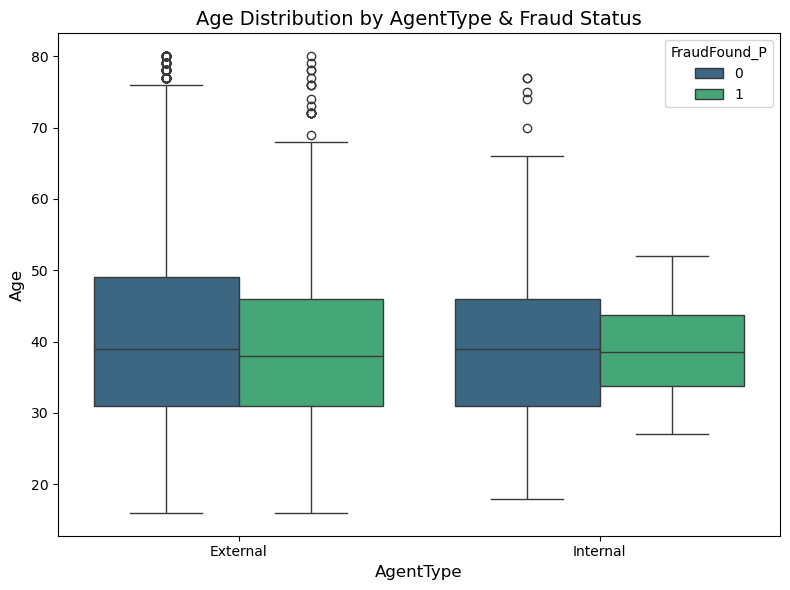

In [159]:
groups_3 = df.groupby(['AgentType', 'FraudFound_P'])['Age']

for (cat_val, fraud_val), group_data_3 in groups:
    Q1_3 = group_data_3.quantile(0.25)
    Q3_3 = group_data_3.quantile(0.75)
    IQR_3 = Q3_3 - Q1_3
    lower_3 = Q1_3 - 1.5 * IQR_3
    upper_3 = Q3_3 + 1.5 * IQR_3
    outliers_3 = group_data_3[(group_data_3 < lower_3) | (group_data_3 > upper_3)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='AgentType', y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {'AgentType'} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('AgentType', fontsize=12)
plt.tight_layout()
plt.savefig('boxplot_agent_type.png')
plt.show()

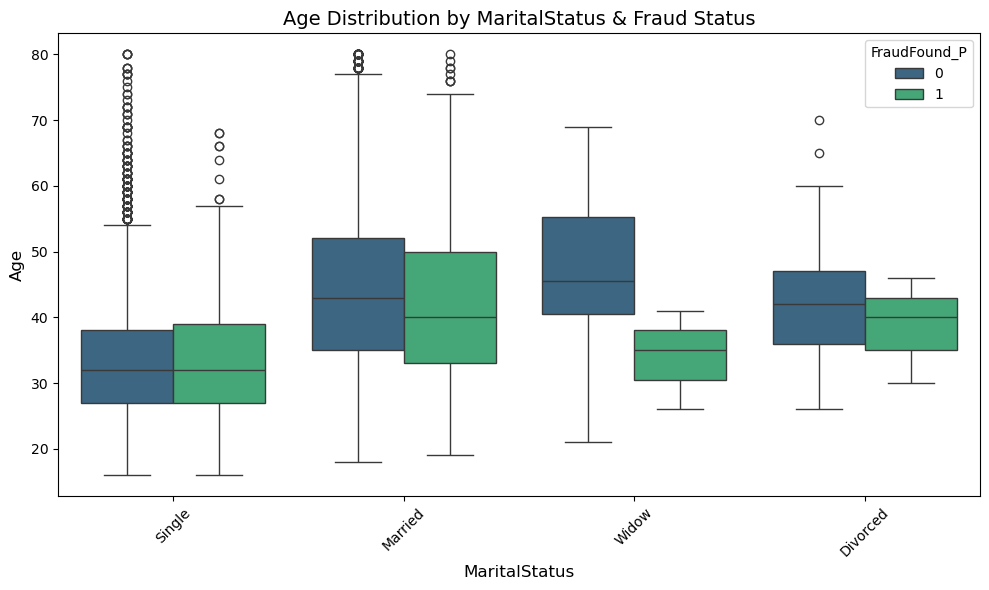

In [167]:
groups_4 = df.groupby(['MaritalStatus', 'FraudFound_P'])['Age']

for (cat_val, fraud_val), group_data_4 in groups:
    Q1_4 = group_data_4.quantile(0.25)
    Q3_4 = group_data_4.quantile(0.75)
    IQR_4 = Q3_4 - Q1_4
    lower_4 = Q1_4 - 1.5 * IQR_4
    upper_4 = Q3_4 + 1.5 * IQR_4
    outliers_4 = group_data_4[(group_data_4 < lower_4) | (group_data_4 > upper_4)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {'MaritalStatus'} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('MaritalStatus', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_marital_status.png')
plt.show()

<Axes: xlabel='FraudFound_P', ylabel='Deductible'>

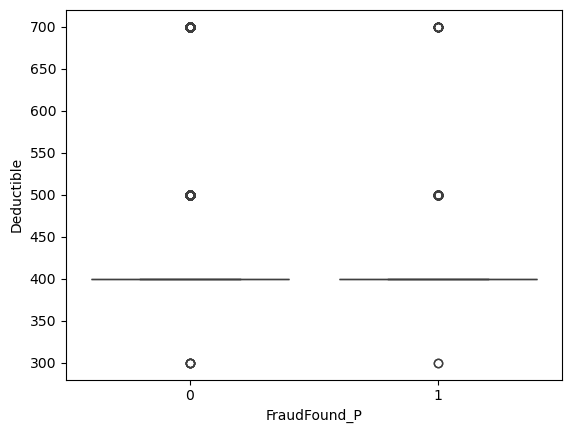

In [77]:
sns.boxplot(x='FraudFound_P', y='Deductible', data=df)

6.	Create EDA Report
-	Document findings in notebook
-	Note: Which features seem important?
-	Note: Any data quality issues?
-	Note: Class imbalance ratio


In [80]:
# Select the categorical columns identified as important
categorical_features = ['Fault', 'AgentType', 'AccidentArea', 'MaritalStatus']